In [1]:
# Homework-1, Question 10, K nearest Nighbour: written by Kamal jnawali
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

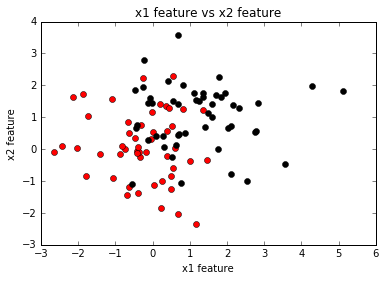

In [2]:

N1=50
N2=50
np.random.seed(2)
x1=np.random.randn(N1,2)
x2=np.random.randn(N2,2)+1
X=np.r_[x1,x2]
t=np.r_[np.zeros(N1), np.ones(N2)]
color=['ro','ko']
uniq=np.unique(t)
for i in range(2):
    index=t==uniq[i]
    plt.plot(X[index,0],X[index,1],color[i])
    plt.xlabel('x1 feature')
    plt.ylabel('x2 feature')
    plt.title('x1 feature vs x2 feature')




            

        
        
    

In [3]:
Nfold=10
size=(N1+N2)/Nfold
size1=np.ones(size)*size
start=np.r_[0 , np.cumsum(size1)]
order=np.random.permutation(N1+N2)
Knnerror=[]
K=np.arange(1,20,2)
for f in range(len(K)):
    kvalue=K[f]
    Error1=[]
    for g in range(Nfold):
        onlyvalue=order[start[g]:start[g+1]]
        trainx=X
        traint=t
        testx=X[onlyvalue]
        testt=t[onlyvalue]
        trainx1=np.delete(trainx[:,0],onlyvalue)
        trainx2=np.delete(trainx[:,1],onlyvalue)
        trainx=zip(trainx1,trainx2)
        traint=np.delete(t,onlyvalue)
        countclass=[]
        for i in range(testt.shape[0]):
            dist=trainx-testx[i]
            squaredist=dist**2
            sumdist=squaredist.sum(axis=1)
            sortdist=sumdist.argsort()
            index=sortdist[0:kvalue]
            labels=traint[index]
            classlabel=statistics.mode(labels)
            countclass.append(classlabel)
        Error=sum(countclass != testt)
        Error1.append(Error)
        #print len(labels)
    totalerror=1.*sum(Error1)
    Knnerror.append(totalerror)
          

C:\Users\kamal\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


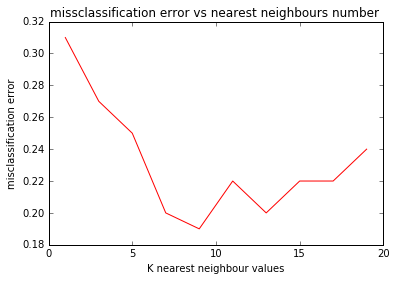

In [4]:

plt.plot(K,np.array(Knnerror)/(N1+N2),'r')
plt.xlabel('K nearest neighbour values')
plt.ylabel('misclassification error')
plt.title('missclassification error vs nearest neighbours number ')
plt.show() 

In [5]:
Miscllassification_Error=np.array(Knnerror)/(N1+N2)
print Miscllassification_Error

[ 0.31  0.27  0.25  0.2   0.19  0.22  0.2   0.22  0.22  0.24]


In [6]:
# Best k value in our case is K=9